# Generating Poetry using an LSTM Neural Network

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [22]:
tokenizer = Tokenizer()

data = open('data/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(total_words)

2690


In [23]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create x-values (padded sequence fed in NN) and label (the next token in sequence expected)
xs, label = input_sequences[:,:-1],input_sequences[:,-1]

# on-hot-encode the label 
ys = ku.to_categorical(label, num_classes=total_words)

In [24]:
corpus[0]

'come all ye maidens young and fair'

In [26]:
xs[8]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2, 11, 15],
      dtype=int32)

In [29]:
ys[8]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [30]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 15, 300)           301200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 300)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 1345)              135845    
_________________________________________________________________
dense_5 (Dense)              (None, 2690)              3620740   
Total params: 4,487,185
Trainable params: 4,487,185
Non-trainable params: 0
____________________________________________

In [31]:
 history = model.fit(xs, ys, epochs=300, verbose=1)

Train on 12038 samples
Epoch 1/300
12038/12038 [==============================] - 68s 6ms/sample - loss: 6.8106 - accuracy: 0.0636
Epoch 2/300
12038/12038 [==============================] - 50s 4ms/sample - loss: 6.3215 - accuracy: 0.0657
Epoch 3/300
12038/12038 [==============================] - 45s 4ms/sample - loss: 6.1731 - accuracy: 0.0676
Epoch 4/300
12038/12038 [==============================] - 45s 4ms/sample - loss: 6.0339 - accuracy: 0.0759
Epoch 5/300
12038/12038 [==============================] - 45s 4ms/sample - loss: 5.9365 - accuracy: 0.0821
Epoch 6/300
12038/12038 [==============================] - 45s 4ms/sample - loss: 5.8353 - accuracy: 0.0891
Epoch 7/300
12038/12038 [==============================] - 45s 4ms/sample - loss: 5.7301 - accuracy: 0.0961
Epoch 8/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 5.6342 - accuracy: 0.1033
Epoch 9/300
12038/12038 [==============================] - 45s 4ms/sample - loss: 5.5500 - accuracy: 0.1082
Epoch

12038/12038 [==============================] - 45s 4ms/sample - loss: 2.3288 - accuracy: 0.5519
Epoch 77/300
12038/12038 [==============================] - 45s 4ms/sample - loss: 2.2858 - accuracy: 0.5672
Epoch 78/300
12038/12038 [==============================] - 45s 4ms/sample - loss: 2.2749 - accuracy: 0.5703
Epoch 79/300
12038/12038 [==============================] - 45s 4ms/sample - loss: 2.2402 - accuracy: 0.5749
Epoch 80/300
12038/12038 [==============================] - 46s 4ms/sample - loss: 2.2035 - accuracy: 0.5858
Epoch 81/300
12038/12038 [==============================] - 45s 4ms/sample - loss: 2.1838 - accuracy: 0.5944
Epoch 82/300
12038/12038 [==============================] - 45s 4ms/sample - loss: 2.1538 - accuracy: 0.5967
Epoch 83/300
12038/12038 [==============================] - 52s 4ms/sample - loss: 2.1509 - accuracy: 0.5950
Epoch 84/300
12038/12038 [==============================] - 49s 4ms/sample - loss: 2.1182 - accuracy: 0.6012
Epoch 85/300
12038/12038 [======

12038/12038 [==============================] - 47s 4ms/sample - loss: 1.2384 - accuracy: 0.7761
Epoch 151/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 1.2332 - accuracy: 0.7770
Epoch 152/300
12038/12038 [==============================] - 46s 4ms/sample - loss: 1.2265 - accuracy: 0.7770
Epoch 153/300
12038/12038 [==============================] - 46s 4ms/sample - loss: 1.2105 - accuracy: 0.7819
Epoch 154/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 1.2112 - accuracy: 0.7821
Epoch 155/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 1.1935 - accuracy: 0.7843
Epoch 156/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 1.1825 - accuracy: 0.7858
Epoch 157/300
12038/12038 [==============================] - 46s 4ms/sample - loss: 1.1888 - accuracy: 0.7876
Epoch 158/300
12038/12038 [==============================] - 46s 4ms/sample - loss: 1.1824 - accuracy: 0.7893
Epoch 159/300
12038/1203

12038/12038 [==============================] - 47s 4ms/sample - loss: 0.9022 - accuracy: 0.8320
Epoch 225/300
12038/12038 [==============================] - 46s 4ms/sample - loss: 0.9025 - accuracy: 0.8297
Epoch 226/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 0.8979 - accuracy: 0.8330
Epoch 227/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 0.8948 - accuracy: 0.8314
Epoch 228/300
12038/12038 [==============================] - 46s 4ms/sample - loss: 0.8960 - accuracy: 0.8290
Epoch 229/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 0.8953 - accuracy: 0.8312
Epoch 230/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 0.8835 - accuracy: 0.8348
Epoch 231/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 0.8815 - accuracy: 0.8339
Epoch 232/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 0.8810 - accuracy: 0.8343
Epoch 233/300
12038/1203

12038/12038 [==============================] - 46s 4ms/sample - loss: 0.7806 - accuracy: 0.8412
Epoch 299/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 0.7737 - accuracy: 0.8467
Epoch 300/300
12038/12038 [==============================] - 47s 4ms/sample - loss: 0.7681 - accuracy: 0.8435


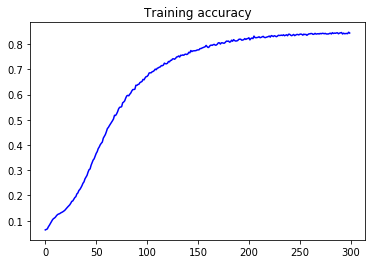

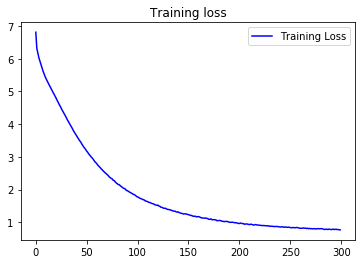

In [32]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [34]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope i took on a lad that no hiii died of that had i cant remember when writin a wish my love young and low away behind from your eyes glisten are sweetly dearly fresh as the banks of the bay that do her roses my pale friend a girl i might meet below over the broad majestic shannon she gave me her hope and play there i was my father died and made him a man saw she said mine the begging id the stars of mooncoin all one was over gilgarra mountain loved me old wild today of its


In [35]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/poetry_gen_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/poetry_gen_model/assets


In [37]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/poetry_gen_model

poetry_gen_model
assets	saved_model.pb	variables


In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('saved_model/poetry_gen_model')

# Check its architecture
new_model.summary()


In [45]:
seed_text = "Give me a"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = new_model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Give me a boat that can carry two agin again away by his hair but volunteers thy eyes roses all all the street on that a stroll all among the quality gardens with liffey and the broad majestic shannon their mantle that beaming smile laughing went to me my day love wind wind under their real love the fields down of the day fair white song wind ones hair with bright green sea love so smiling wish me father love love love the banks of the day young days of her journey to doneen not fresh and me new land of me glass


In [46]:
# training the model will pick up where it left off... 
history = new_model.fit(xs, ys, epochs=5, verbose=1)

Train on 12038 samples
Epoch 1/5
12038/12038 [==============================] - 52s 4ms/sample - loss: 0.7754 - accuracy: 0.8475
Epoch 2/5
12038/12038 [==============================] - 47s 4ms/sample - loss: 0.7523 - accuracy: 0.8483
Epoch 3/5
12038/12038 [==============================] - 47s 4ms/sample - loss: 0.7435 - accuracy: 0.8486
Epoch 4/5
12038/12038 [==============================] - 45s 4ms/sample - loss: 0.7417 - accuracy: 0.8508
Epoch 5/5
12038/12038 [==============================] - 45s 4ms/sample - loss: 0.7437 - accuracy: 0.8486
